[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109]
[40 41 42 43 44 45 46 47 48 49]


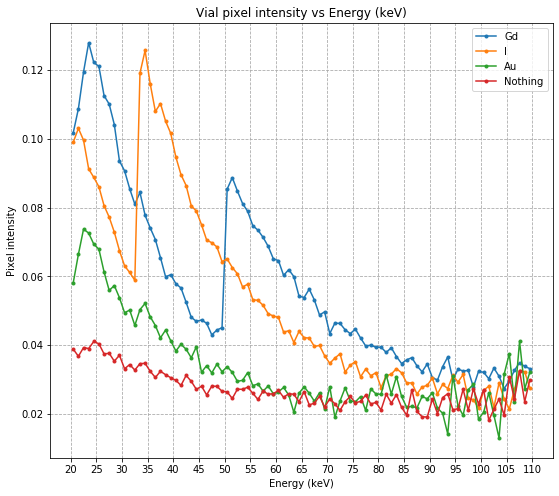

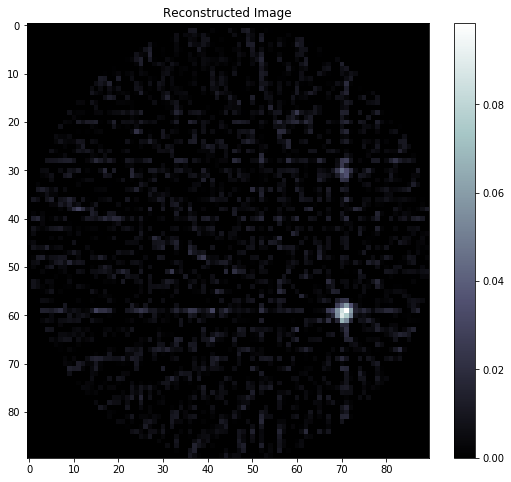

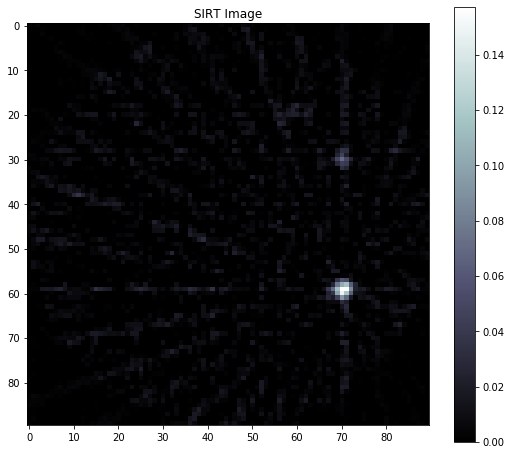

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra
%matplotlib inline

# bin_width=1
# bins=np.arange(20,110,bin_width)
# #airscans
# airscan_counts = [sum(genfromtxt("Desktop/CT imaging/27-5-2021/air_scan.mca", skip_header=int(round(i*550/81+12)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in bins] 
# master_counts=[]
# tot_counts=[]
# avg_counts=[]
# for k in np.arange(0,len(bins)):
#     for i in np.arange(0,360,10):
#         for j in np.arange(1,91):
#             counts = genfromtxt("Desktop/CT imaging/27-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round(bins[k]*550/81+12)),max_rows=int(round(bin_width*550/81)))
#             avg_counts.append(-np.log(sum(counts)/int(round(bin_width*550/81))/airscan_counts[k]))
#             counts=0
#         tot_counts.append(avg_counts)
#         avg_counts=[]
#     master_counts.append(tot_counts)
#     tot_counts=[]
    

# master_counts=np.array(master_counts)
# master_counts=[np.transpose(x) for x in master_counts]
# print(np.shape(master_counts))
#np.save("Desktop/CT imaging/27-5-2021/sino_2kev",master_counts)

print(bins)
#image reconstruction 
theta=np.arange(0,360,10)
# for i in np.arange(0,len(bins)):
#     image=iradon(master_counts[i],theta=theta)
#     image[image<0] = 0
#     figure(i,figsize=(9,8))
#     plt.imshow(image,aspect='auto',cmap='bone')
#     plt.colorbar()
#     plt.title('Reconstructed Image')


images=[]
for i in np.arange(0,len(bins)):
    images.append(iradon(master_counts[i],theta=theta))
    images[i][images[i]<0]=0
    

# coords1=plt.ginput(n=-1,timeout=-1,show_clicks=True)
# coords1=np.array(coords1)
# coords1=np.round(coords1)
# coords1=np.sort(coords1,axis=0)
# print(coords1)


# coords2=plt.ginput(n=-1,timeout=-1,show_clicks=True)
# coords2=np.array(coords2)
# coords2=np.round(coords2)
# coords2=np.sort(coords2,axis=0)
# print(coords2)

# coords3=plt.ginput(n=-1,timeout=-1,show_clicks=True)
# coords3=np.array(coords3)
# coords3=np.round(coords3)
# coords3=np.sort(coords3,axis=0)
# print(coords3)
# %matplotlib inline

coords1= np.array([[19., 59.], [20. ,59.], [21., 59.] ,[19. ,60.] ,[20., 60.] ,[21., 60.] ,[19., 61.] ,[20., 61.] ,[21., 61.]])
coords2= np.array([[70., 58.], [71., 58.], [69., 59.], [70., 59.], [71., 59.], [72., 59.], [69., 60.], [70., 60.],[71., 60.], [72., 60.], [70., 61.], [71., 61.]])
coords3=np.array([[30., 44.], [29., 45.], [30., 45.], [31. ,45.], [30., 46.]])
coords4= np.arange(40,50,1)
print(coords4)
mask=np.zeros(shape=(90,90))
for x,y in coords1:
    mask[int(y)][int(x)]=1
vial1=mask*images
vial1[vial1==0]=np.nan
vial1_mean=[np.nanmean(i) for i in vial1]

mask=np.zeros(shape=(90,90))
for x,y in coords2:
    mask[int(y)][int(x)]=1
vial2=mask*images
vial2[vial2==0]=np.nan
vial2_mean=[np.nanmean(i) for i in vial2]

mask=np.zeros(shape=(90,90))
for x,y in coords3:
    mask[int(y)][int(x)]=1
vial3=mask*images
vial3[vial3==0]=np.nan
vial3_mean=[np.nanmean(i) for i in vial3]

mask=np.zeros(shape=(90,90))
for x in coords4:
    mask[int(x)][int(x)]=1
vial4=mask*images
vial4[vial4==0]=np.nan
vial4_mean=[np.nanmean(i) for i in vial4]

#intensity of vials vs energy
figure(2,figsize=(9,8))
plt.plot(bins+bin_width/2,vial1_mean,marker='.',label='Gd')
plt.plot(bins+bin_width/2,vial2_mean,marker='.',label='I')
plt.plot(bins+bin_width/2,vial3_mean,marker='.',label='Au')
plt.plot(bins+bin_width/2,vial4_mean,marker='.',label='Nothing')
plt.title('Vial pixel intensity vs Energy (keV)')
plt.grid(linestyle='--',c='darkgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Pixel intensity') 
plt.locator_params(axis="x", nbins=30)
plt.legend()

subtraction=master_counts[14]-master_counts[12]
image=iradon(subtraction,theta=theta)
image[image<0] = 0
figure(3,figsize=(9,8))
plt.imshow(image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image')

    



#create geometries and projector
proj_geom = astra.create_proj_geom('parallel', 1,90, np.arange(0,2*np.pi,np.pi/18));
vol_geom = astra.create_vol_geom(90,90);
sinogram = astra.data2d.create('-sino',proj_geom,np.transpose(subtraction));
recon_id = astra.data2d.create('-vol', vol_geom,data=iradon(subtraction,theta=theta))
proj_id= astra.create_projector('line',proj_geom,vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('CGLS')
cfg['ReconstructionDataId'] = recon_id
cfg['ProjectionDataId'] = sinogram
cfg['ProjectorId']=proj_id
# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 10)

# Get the result
rec3 = astra.data2d.get(recon_id)
rec3[rec3<0] = 0
figure(4,figsize=(9,8))
plt.imshow(rec3,cmap='bone')
plt.colorbar()
plt.title('SIRT Image')


# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(recon_id)
astra.projector.delete(proj_id)
